In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
from IPython.core.display import display, HTML
%matplotlib inline
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Подгружаем данные

df = pd.read_excel('ic2s2-2015.xlsx')
df.head()

,Type,Speaker,Topic
0,Keynote,Michael Macy,Opportunities and challenges for computational...
1,Keynote,Jure Leskovec,Structure and dynamics of information propagation
2,Plenary,"Omar Guerrero, Eduardo López, Robert Axtell",Labor flows and unemployment mediated by networks
3,Keynote,Duncan Watts,An experimental study of collective self-organ...
4,Keynote,Matthew Jackson,Multiplexing and the interaction between borro...


In [3]:
net2015 = nx.Graph()
for speaker_raw, topic in zip(df['Speaker'], df['Topic']):  # loop over two columns
    speakers = speaker_raw.split(', ')  # create list of speakers from cell
    for speaker in speakers:
        if speaker not in net2015.nodes():
            net2015.add_node(speaker, bipartite=0) # Add the node attribute "bipartite"
            
        if topic not in net2015.nodes():
            net2015.add_node(topic, bipartite=1) # Add the node attribute "bipartite"
            
        net2015.add_edge(speaker, topic)

In [4]:
import string
def form_topic_label(text):
    shortcut = ''
    text = text.split(' ')
    for word in text:
        if len(word) < 4:
            continue
        
        if word[0] not in string.punctuation:
            shortcut += word[0]
        
        else:
            shortcut += word[1]
        
    return shortcut


def form_speaker_label(text):
    shortcut = ''
    text = text.split(' ')[-1]
    for sign in string.punctuation:
        text = text.replace(sign, '')
        
    return text


labels = {node: form_speaker_label(node) for node, data in net2015.nodes(data=True) if data['bipartite']==0}
labels2 = {node: form_topic_label(node) for node, data in net2015.nodes(data=True) if data['bipartite']==1}
labels.update(labels2)

nodes_color=list()
for node in net2015.nodes():
    if node in labels2.keys():
        nodes_color.append('b')  # blue = topics
    else:
        nodes_color.append('r')  # red = speakers

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


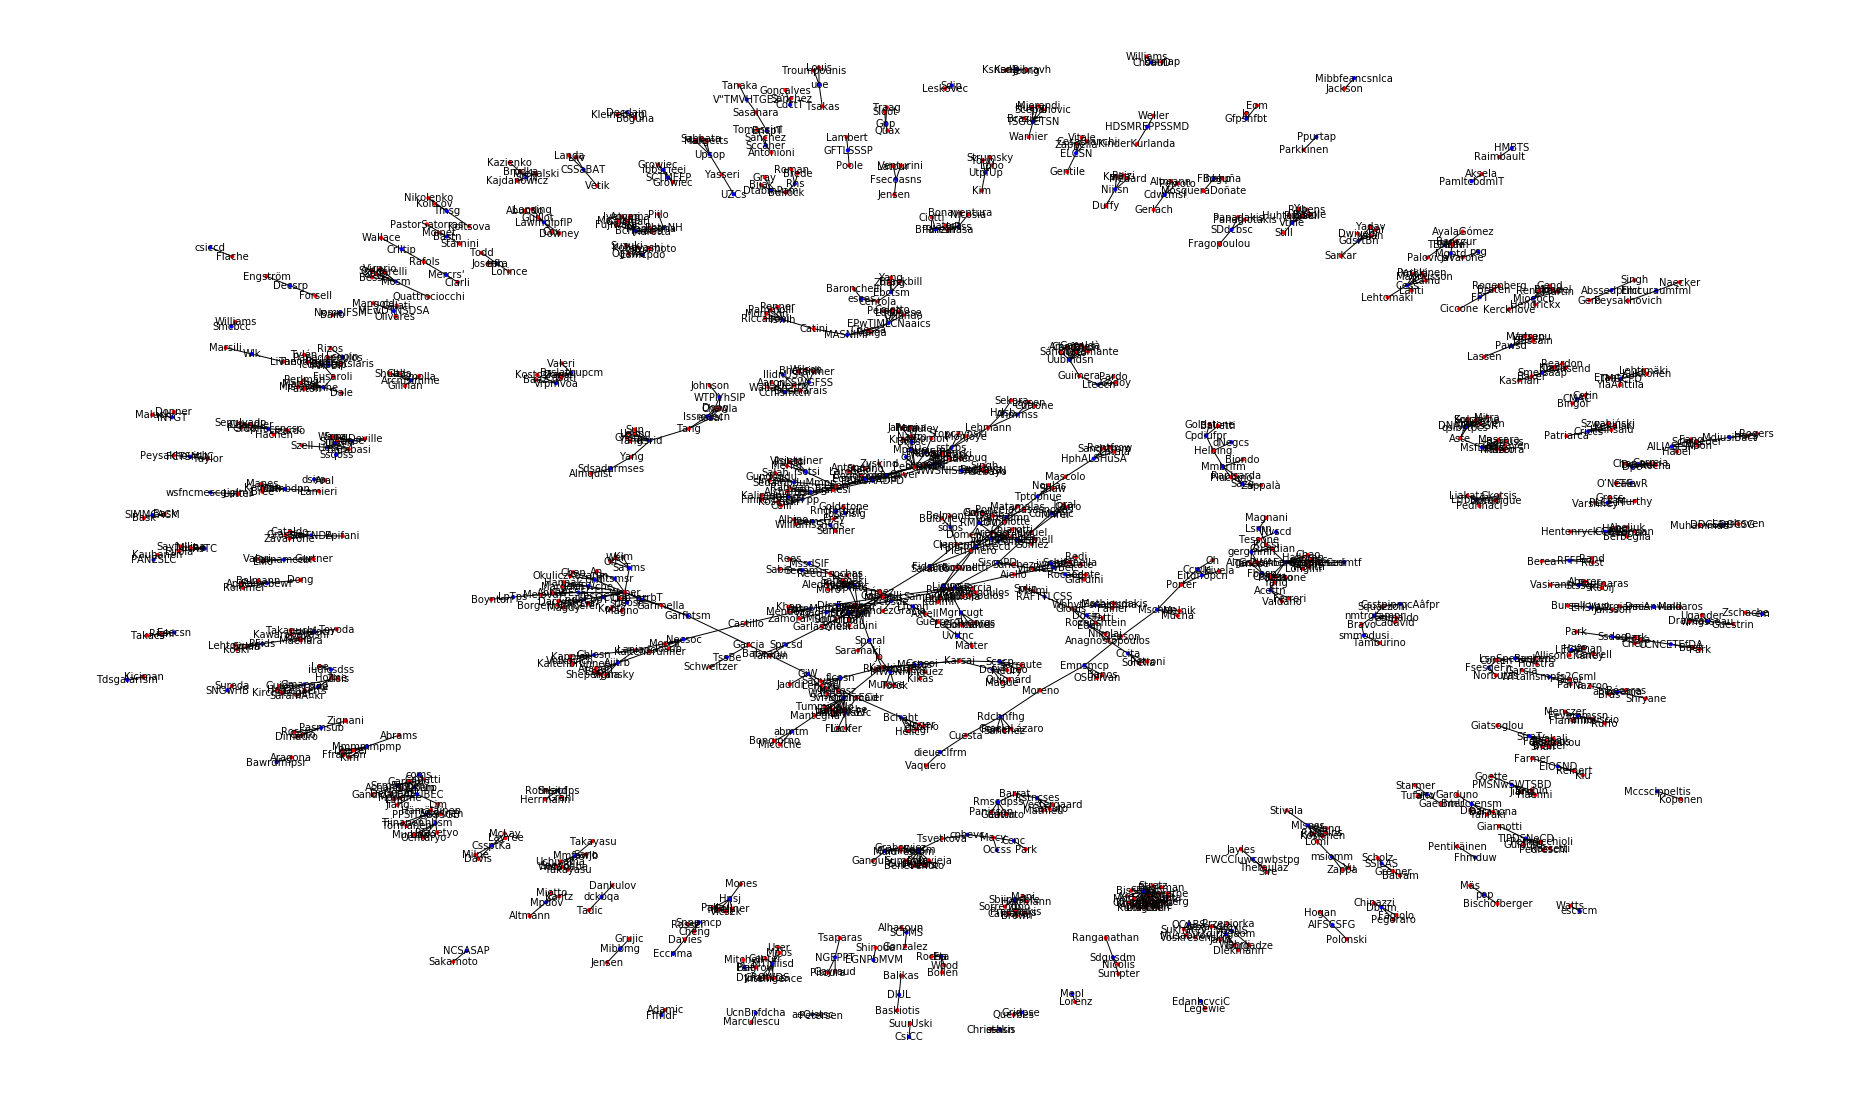

In [5]:
fig = plt.figure(figsize=[25, 15])
nx.draw(net2015, node_size=10, labels=labels, font_size=10, node_color=nodes_color)
plt.savefig('network.png')